In this lab we want to predict which film is going to be rented through a prediction model. In order to do this, I'll connect this ipykernel to mysql Sakila database, creating a query to have back a table with information from the rental, film, film_actor and film_category tables. 

In [1]:
#installing necessary libraries to connect mysql with python
#!conda install -y sqlalchemy
#!conda install -y pymysql

In [2]:
#importing library and introducing pass to enter in mysql data
import pymysql
from sqlalchemy import create_engine
from sqlalchemy import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import getpass
password = getpass.getpass()

········


In [3]:
#getting info from sakila database and creating engine
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [4]:
#creating pd df from sakila.film
data = pd.read_sql_query('SELECT * FROM(SELECT rental_id, rental_date, inventory_id, customer_id, return_date, staff_id, last_update FROM rental UNION SELECT rental_id, rental_date, inventory_id, customer_id, return_date, staff_id, last_update FROM rental_new) as combined_rents JOIN inventory ON combined_rents.inventory_id = inventory.inventory_id JOIN film ON inventory.film_id = film.film_id JOIN film_actor ON film.film_id = film_actor.film_id JOIN film_category ON film_actor.film_id = film_category.film_id', engine)
type(data)

pandas.core.frame.DataFrame

In [5]:
#view df
display(data.head())
display(data.tail())
print(data.shape)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,inventory_id,film_id,store_id,...,replacement_cost,rating,special_features,last_update,actor_id,film_id,last_update,film_id,category_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53,367,80,1,...,21.99,G,Trailers,2006-02-15 05:03:42,16,80,2006-02-15 05:05:03,80,8,2006-02-15 05:07:09
1,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53,367,80,1,...,21.99,G,Trailers,2006-02-15 05:03:42,173,80,2006-02-15 05:05:03,80,8,2006-02-15 05:07:09
2,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53,367,80,1,...,21.99,G,Trailers,2006-02-15 05:03:42,193,80,2006-02-15 05:05:03,80,8,2006-02-15 05:07:09
3,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53,367,80,1,...,21.99,G,Trailers,2006-02-15 05:03:42,200,80,2006-02-15 05:05:03,80,8,2006-02-15 05:07:09
4,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53,1525,333,2,...,16.99,R,"Trailers,Behind the Scenes",2006-02-15 05:03:42,42,333,2006-02-15 05:05:03,333,12,2006-02-15 05:07:09


,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,inventory_id,film_id,store_id,...,replacement_cost,rating,special_features,last_update,actor_id,film_id,last_update,film_id,category_id,last_update
87975,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-15 21:30:53,2666,585,2,...,25.99,G,Trailers,2006-02-15 05:03:42,31,585,2006-02-15 05:05:03,585,7,2006-02-15 05:07:09
87976,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-15 21:30:53,2666,585,2,...,25.99,G,Trailers,2006-02-15 05:03:42,32,585,2006-02-15 05:05:03,585,7,2006-02-15 05:07:09
87977,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-15 21:30:53,2666,585,2,...,25.99,G,Trailers,2006-02-15 05:03:42,61,585,2006-02-15 05:05:03,585,7,2006-02-15 05:07:09
87978,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-15 21:30:53,2666,585,2,...,25.99,G,Trailers,2006-02-15 05:03:42,103,585,2006-02-15 05:05:03,585,7,2006-02-15 05:07:09
87979,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-15 21:30:53,2666,585,2,...,25.99,G,Trailers,2006-02-15 05:03:42,106,585,2006-02-15 05:05:03,585,7,2006-02-15 05:07:09


(87980, 30)


In [6]:
#dropping the duplicated columns that appear after the union/joining tables
data = data.loc[:, ~data.columns.duplicated(keep='first')]

In [7]:
data.duplicated().sum()

0

In [8]:
print(data.shape)

(87980, 22)


In [9]:
may_info = pd.read_sql_query("""
    SELECT
        DISTINCT title, f.film_id,
        CASE
            WHEN r.rental_date BETWEEN '2005-05-01' AND '2005-05-31' THEN 1
            ELSE 0
        END as rented_in_may
    FROM
        film as f
        JOIN inventory as i ON f.film_id = i.film_id
        JOIN rental as r ON i.inventory_id = r.inventory_id
""", engine)

In [10]:
display(may_info.head())
display(may_info.tail())

,title,film_id,rented_in_may
0,ACADEMY DINOSAUR,1,0
1,ACADEMY DINOSAUR,1,1
2,ACE GOLDFINGER,2,0
3,ADAPTATION HOLES,3,0
4,AFFAIR PREJUDICE,4,0


,title,film_id,rented_in_may
1580,ZHIVAGO CORE,998,1
1581,ZOOLANDER FICTION,999,0
1582,ZOOLANDER FICTION,999,1
1583,ZORRO ARK,1000,0
1584,ZORRO ARK,1000,1


In [11]:
may_info.duplicated().sum()

0

In [12]:
data_merged = pd.merge(data, may_info, on='film_id', how='left')

In [13]:
data_merged.duplicated().sum()

0

In [14]:
display(data_merged.head())
display(data_merged.tail())
print(data_merged.shape)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,film_id,store_id,title_x,...,rental_duration,rental_rate,length,replacement_cost,rating,special_features,actor_id,category_id,title_y,rented_in_may
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53,80,1,BLANKET BEVERLY,...,7,2.99,148,21.99,G,Trailers,16,8,BLANKET BEVERLY,0
1,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53,80,1,BLANKET BEVERLY,...,7,2.99,148,21.99,G,Trailers,16,8,BLANKET BEVERLY,1
2,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53,80,1,BLANKET BEVERLY,...,7,2.99,148,21.99,G,Trailers,173,8,BLANKET BEVERLY,0
3,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53,80,1,BLANKET BEVERLY,...,7,2.99,148,21.99,G,Trailers,173,8,BLANKET BEVERLY,1
4,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53,80,1,BLANKET BEVERLY,...,7,2.99,148,21.99,G,Trailers,193,8,BLANKET BEVERLY,0


,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,film_id,store_id,title_x,...,rental_duration,rental_rate,length,replacement_cost,rating,special_features,actor_id,category_id,title_y,rented_in_may
151942,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-15 21:30:53,585,2,MOB DUFFEL,...,4,0.99,105,25.99,G,Trailers,61,7,MOB DUFFEL,1
151943,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-15 21:30:53,585,2,MOB DUFFEL,...,4,0.99,105,25.99,G,Trailers,103,7,MOB DUFFEL,0
151944,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-15 21:30:53,585,2,MOB DUFFEL,...,4,0.99,105,25.99,G,Trailers,103,7,MOB DUFFEL,1
151945,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-15 21:30:53,585,2,MOB DUFFEL,...,4,0.99,105,25.99,G,Trailers,106,7,MOB DUFFEL,0
151946,16049,2005-08-23 22:50:12,2666,393,2005-08-30 01:01:12,2,2006-02-15 21:30:53,585,2,MOB DUFFEL,...,4,0.99,105,25.99,G,Trailers,106,7,MOB DUFFEL,1


(151947, 24)


In [15]:
#checking any data inconsistencias a null values
display(data_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151947 entries, 0 to 151946
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   rental_id             151947 non-null  int64         
 1   rental_date           151947 non-null  datetime64[ns]
 2   inventory_id          151947 non-null  int64         
 3   customer_id           151947 non-null  int64         
 4   return_date           150228 non-null  datetime64[ns]
 5   staff_id              151947 non-null  int64         
 6   last_update           151947 non-null  datetime64[ns]
 7   film_id               151947 non-null  int64         
 8   store_id              151947 non-null  int64         
 9   title_x               151947 non-null  object        
 10  description           151947 non-null  object        
 11  release_year          151947 non-null  int64         
 12  language_id           151947 non-null  int64         
 13 

None

In [16]:
#Im going to drop the columns I consider not relevant to include on the model
data_merged.drop(columns=['film_id','rental_id', 'inventory_id', 'customer_id', 
                       'return_date', 'staff_id', 'last_update', 'store_id',
                        'description', 'language_id', 'release_year', 'original_language_id', 
                         'title_x', 'title_y', 'rental_date'], inplace=True)
print('This is the total NaNs of data_merged: ', data_merged.isna().sum())

This is the total NaNs of data_merged:  rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
special_features    0
actor_id            0
category_id         0
rented_in_may       0
dtype: int64


In [17]:
display(data_merged)

,rental_duration,rental_rate,length,replacement_cost,rating,special_features,actor_id,category_id,rented_in_may
0,7,2.99,148,21.99,G,Trailers,16,8,0
1,7,2.99,148,21.99,G,Trailers,16,8,1
2,7,2.99,148,21.99,G,Trailers,173,8,0
3,7,2.99,148,21.99,G,Trailers,173,8,1
4,7,2.99,148,21.99,G,Trailers,193,8,0
...,...,...,...,...,...,...,...,...,...
151942,4,0.99,105,25.99,G,Trailers,61,7,1
151943,4,0.99,105,25.99,G,Trailers,103,7,0
151944,4,0.99,105,25.99,G,Trailers,103,7,1
151945,4,0.99,105,25.99,G,Trailers,106,7,0


In [18]:
#checking for any duplicated rows
print(data_merged.duplicated().sum())

143320


In [19]:
data_merged = data_merged.drop_duplicates(keep='first')

In [20]:
print(data_merged.duplicated().sum())

0


In [21]:
display(data_merged)

,rental_duration,rental_rate,length,replacement_cost,rating,special_features,actor_id,category_id,rented_in_may
0,7,2.99,148,21.99,G,Trailers,16,8,0
1,7,2.99,148,21.99,G,Trailers,16,8,1
2,7,2.99,148,21.99,G,Trailers,173,8,0
3,7,2.99,148,21.99,G,Trailers,173,8,1
4,7,2.99,148,21.99,G,Trailers,193,8,0
...,...,...,...,...,...,...,...,...,...
81037,7,2.99,72,15.99,R,"Trailers,Behind the Scenes",12,6,0
81038,7,2.99,72,15.99,R,"Trailers,Behind the Scenes",49,6,0
81039,7,2.99,72,15.99,R,"Trailers,Behind the Scenes",157,6,0
82966,5,4.99,88,11.99,R,"Trailers,Deleted Scenes,Behind the Scenes",121,12,0


In [22]:
#checking unique values for the remaining columns
for col in data_merged:
    print(data_merged[col].unique())

[7 6 5 4 3]
[2.99 0.99 4.99]
[148 126 156 181  84  92 123  56  62 109 119 184 158  48 121 166  81 136
 147  58 182 141 112 135 114 165 100 130 153 105  77 167  63 177 111 149
 137 102 161  46 144 139 155 173  73 172 127  54 150 122 108 180  90 113
  74  88  97 140  61 162  99 176 116  64 133 107  86  93  91  76  78  51
  71  65  75 110  59  85  55 183 143  94 118 185 145 170  47 178 129 163
 152  87 103  68 169  57  89 174 106  83  53  69 146 151 120  70 101 168
 117 125 104 179 164  52  80 134  96 142  98 154  49 138 175 159 171 160
 131 157  82  67 124 132 128  60  79  50  95 115  66  72]
[21.99 16.99 14.99 29.99 19.99 12.99  9.99 18.99 11.99 17.99 24.99 13.99
 10.99 28.99 25.99 23.99 20.99 22.99 27.99 15.99 26.99]
['G' 'R' 'NC-17' 'PG-13' 'PG']
['Trailers' 'Trailers,Behind the Scenes' 'Commentaries,Behind the Scenes'
 'Trailers,Commentaries' 'Deleted Scenes,Behind the Scenes'
 'Commentaries,Deleted Scenes,Behind the Scenes'
 'Trailers,Commentaries,Deleted Scenes' 'Behind the Scenes'

In [23]:
columns_skew_3 = []
for col in data_merged.select_dtypes(include='number'):
    if data_merged[col].skew() > 3:
        columns_skew_3.append(col)

In [24]:
print(columns_skew_3)

[]


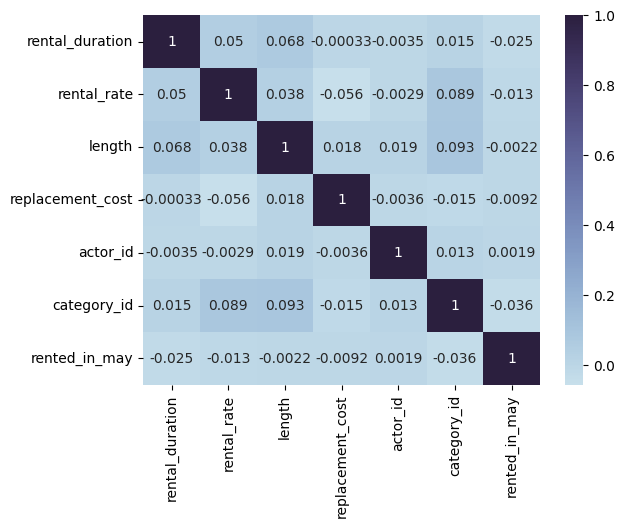

In [25]:
correlations_matrix = data_merged.select_dtypes(include = np.number).corr()
cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given columns
def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    X.loc[:,'intercept'] = 1

    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

In [27]:
selected_columns = list(data_merged.select_dtypes(include = np.number).columns)

vif_data_merged = compute_vif(data_merged, selected_columns)
display(vif_data_merged)

,Variable,VIF
0,category_id,1.017775
1,length,1.014854
2,rental_rate,1.014307
3,rental_duration,1.007601
4,replacement_cost,1.003794
5,rented_in_may,1.002079
6,actor_id,1.000526


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = data_merged['rented_in_may']
X = data_merged.drop(columns='rented_in_may', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1020)

In [29]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test, columns = X.columns)

y_train_df = pd.DataFrame(y_train)
y_test_df  = pd.DataFrame(y_test)

In [30]:
X_train_num = X_train_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = object)

X_test_num = X_test_df.select_dtypes(include = np.number)
X_test_cat = X_test_df.select_dtypes(include = object)

In [31]:
#I will apply a Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [40]:
X_num_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_num_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)

In [41]:
display(X.select_dtypes(include = object))

,rating,special_features
0,G,Trailers
1,G,Trailers
2,G,Trailers
3,G,Trailers
4,G,Trailers
...,...,...
81037,R,"Trailers,Behind the Scenes"
81038,R,"Trailers,Behind the Scenes"
81039,R,"Trailers,Behind the Scenes"
82966,R,"Trailers,Deleted Scenes,Behind the Scenes"


both are nominals, so I'll apply OneHotEncoder to all X_cat

In [42]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', sparse_output=False)

X_cat_train_encoded = encoder.fit_transform(X_train_cat)
X_cat_test_encoded = encoder.transform(X_test_cat)

In [43]:
X_cat_train_encoded_df = pd.DataFrame(data = X_cat_train_encoded, columns=encoder.get_feature_names_out())
X_cat_test_encoded_df = pd.DataFrame(data = X_cat_test_encoded, columns=encoder.get_feature_names_out())

In [44]:
import os
import pickle 

path = "transformers/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "MinMax_scaler.pkl"
with open(path+filename, "wb") as file:
  pickle.dump(scaler, file) 

path = "encoders/"
isExist = os.path.exists(path)
if not isExist:
  os.makedirs(path)
  print("The new directory is created!")

filename = "OneHotEncoder.pkl" 
with open(path+filename, "wb") as file:
   pickle.dump(encoder, file) 

In [45]:
concat_X_train = pd.concat([X_cat_train_encoded_df,X_num_train_scaled_df], axis=1)
#display(concat_X_train)

concat_X_test = pd.concat([X_cat_test_encoded_df,X_num_test_scaled_df], axis=1)
#display(concat_X_test)

In [47]:
concat_X_train = concat_X_train.fillna(0)
concat_X_test = concat_X_test.fillna(0)

In [48]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(concat_X_train, y_train_df) 

path = "./"
model_file_name = "linear_model.pkl"

with open(path + model_file_name, "wb") as file:
    pickle.dump(linear_model, file)

In [49]:
y_train_pred = linear_model.predict(concat_X_train)
y_test_pred  = linear_model.predict(concat_X_test)

In [50]:
results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,1,[0.37158203125]
1,Train,1,[0.3916015625]
2,Train,0,[0.431640625]
3,Train,0,[0.39453125]
4,Train,0,[0.3759765625]


As there where not a high correlation between the columns in the original dataframe or either the merged dataframe, it was expected that the real and predicted columns would have discrepancies. It seems model predictes better the movies that have been rented on any other month that is not may. 

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    Fill in
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_train, y_pred_train)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_train, y_pred_train, squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_train, y_pred_train)

    results = {"Metric": ['MAE', 'MSE', 'RMSE', 'R2'],
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [52]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,0.47,0.47
1,MSE,0.24,0.24
2,RMSE,0.49,0.49
3,R2,0.01,0.01


In [53]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,1,[0.37158203125],[0.62841796875]
1,Train,1,[0.3916015625],[0.6083984375]
2,Train,0,[0.431640625],[-0.431640625]
3,Train,0,[0.39453125],[-0.39453125]
4,Train,0,[0.3759765625],[-0.3759765625]
